# Logistic Regression

`Logistic regression` is a `classification` algorithm used to assign observations to a discrete set of classes. 
Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the `logistic sigmoid function` to return a `probability value` which can then be mapped to two or more discrete classes.

Logistic regression can be used for:
1. Binary Classification - Yes/No, Male/Female, Survive/Die, True/False, 0/1
2. Multi-class Classification - Colors such as Red, green, blue
3. Multi-lable clafication - one think can be clasified with more than one labels, such as a movie can be clasified by language, action, origion etc.
4. One-vs-Rest Classification - 

## Assumptions of Logistic regression
1. The dependent variable must be categorical in nature.
2. The independent variables(features) must be independent.
3. There should be no outliers in the data. Check for outliers.
4. There should be no high correlations among the independent variables. This can be checked using a correlation matrix.

In [22]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [23]:
# data import
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [25]:
# pre prcoess the data
# remove the deck column
df.drop('deck', axis=1, inplace=True)
# impute missing values in age and fare
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)
# impute missing values in embark and embarked town
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# encode the categorical variables using for loop where object and categoy datatypes are given
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [26]:
# X and y column
X = df.drop('survived', axis=1)
y = df['survived']

In [27]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
# model call
model = LogisticRegression()

In [29]:
# train the model
model.fit(X_train, y_train)

c:\Users\nauma\miniconda3\envs\python_ml\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
# predict the values
y_pred = model.predict(X_test)

**Accuracy Score:**
- The accuracy score is a measure of the overall correctness of a classification model. It calculates the ratio of correctly predicted instances to the total instances. The formula for accuracy is:

  \[ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} \]

  - **Example:**
    - If a model correctly predicts 90 out of 100 instances, the accuracy is \( \frac{90}{100} = 0.9 \) or 90%.

**Recall Score (Sensitivity or True Positive Rate):**
- Recall measures the ability of a model to capture all the relevant instances. It calculates the ratio of true positive predictions to the total actual positive instances. The formula for recall is:

  \[ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}} \]

  - **Example:**
    - In a medical diagnosis model, recall is the proportion of actual positive cases correctly identified as positive.

**Precision Score:**
- Precision measures the accuracy of positive predictions made by a model. It calculates the ratio of true positive predictions to the total predicted positive instances. The formula for precision is:

  \[ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}} \]

  - **Example:**
    - In a spam email detection model, precision is the proportion of predicted spam emails that are actually spam.

**F1 Score:**
- The F1 Score is the harmonic mean of precision and recall. It provides a balanced measure that considers both false positives and false negatives. The formula for F1 Score is:

  \[ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision + Recall}} \]

  - **Example:**
    - If you want to balance precision and recall in a model, F1 Score is a useful metric.

**Confusion Matrix:**
- A confusion matrix is a table that shows the performance of a classification algorithm on a set of test data. It displays the counts of true positive, true negative, false positive, and false negative predictions.

  |                | Predicted Positive | Predicted Negative |
  | -------------- | ------------------ | ------------------ |
  | Actual Positive | True Positive      | False Negative     |
  | Actual Negative | False Positive     | True Negative      |

  - **Example:**
    - If a binary classification model is predicting whether an email is spam or not, the confusion matrix shows the counts of emails correctly or incorrectly classified as spam or not spam.

These metrics are commonly used in classification tasks to evaluate the performance of machine learning models. High values for accuracy, recall, precision, and F1 Score indicate a well-performing model.

In [31]:
# evaluate the model
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy Score:  1.0
Recall Score:  1.0
Precision Score:  1.0
F1 Score:  1.0
Confusion Matrix: 
 [[112   0]
 [  0  67]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        67

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Text(95.72222222222221, 0.5, 'Actual')

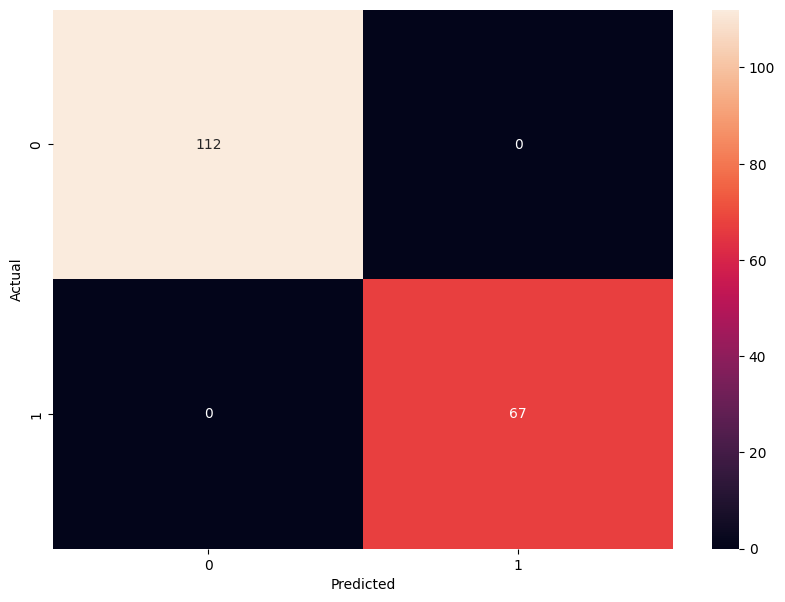

In [32]:
# plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [33]:
# save the model
import pickle
pickle.dump(model, open('./Saved-Models/02_model_logistic_regression.pkl', 'wb'))

### Assignment: Why logistic Regression is a problem of clasification?